An analysis and visualization of the Google Play Dataset, available on Kaggle.

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="whitegrid")
import missingno as msno
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML

In [ ]:
gdp = pd.read_csv('googleplaystore.csv')

In [ ]:
gdp.shape

(10841, 13)

In [ ]:
gdp.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up


<Figure size 1080x576 with 0 Axes>

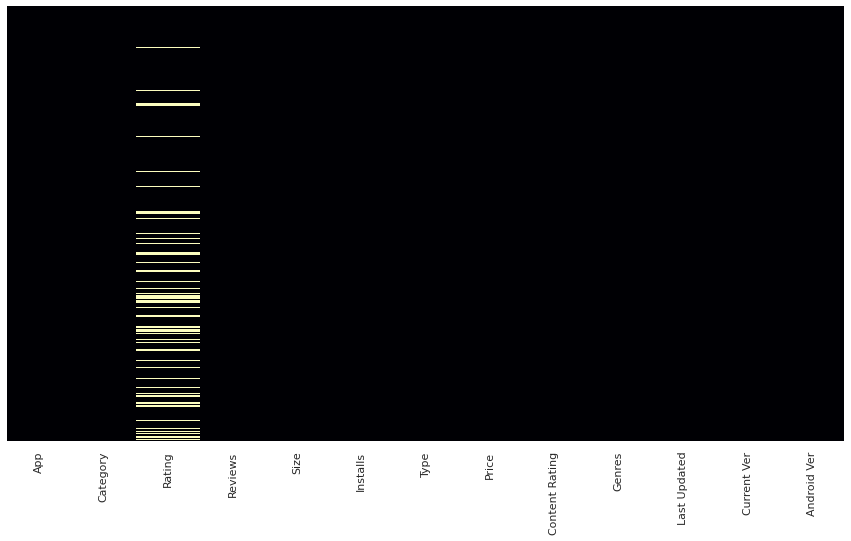

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(gdp.isnull(),cmap='magma',yticklabels=False,cbar=False)
plt.show()

In [ ]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


DATA CLEANING

In [ ]:
gdp.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
gdp.drop('Genres', axis=1,inplace=True)

In [ ]:
gdp.shape

(10841, 12)

In [ ]:
gdp['Install1']=gdp['Installs'].str.replace('+','')
gdp['Install']=gdp['Install1'].str.replace(',','')

In [ ]:
gdp.Size=[x.strip().replace('M','') for x in gdp.Size]
gdp.Size=[x.strip().replace('K','') for x in gdp.Size]

In [ ]:
gdp.drop('Installs',axis=1,inplace=True)
gdp.drop('Install1',axis=1,inplace=True)

In [ ]:
gdp.head(3)

,App,Category,Rating,Reviews,Size,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Install
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,Free,0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,Free,0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,Free,0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up,5000000


In [ ]:
gdp.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Type                 1
Price                0
Content Rating       1
Last Updated         0
Current Ver          8
Android Ver          3
Install              0
dtype: int64

In [ ]:
gdp['Rating'].fillna(data['Rating'].mean(),inplace=True)
gdp['Type'].fillna(method='ffill',inplace=True)
gdp['Content Rating'].fillna(method='ffill',inplace=True)
gdp['Current Ver'].fillna(method='ffill',inplace=True)
gdp['Android Ver'].fillna(method='ffill',inplace=True)

checking any wrong values in the dataset

In [ ]:
gdp[gdp['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Install
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",0,Everyone,Everyone,1.0.19,4.0 and up,4.0.3 and up,Free


In [ ]:
gdp.drop([10472], inplace=True)

In [ ]:
gdp['Reviews']=gdp.Reviews.apply(lambda x: int (x))
gdp['Rating']=gdp.Rating.apply(lambda x: int (x))
gdp['Price']=gdp.Price.apply(lambda x: str (x).replace('$',''))
gdp['Price']=gdp.Price.apply(lambda x: float(x))
gdp['Install']=[int(x) if x.isnumeric() else x for x in gdp['Install']]



In [ ]:
gdp.head(300)

,App,Category,Rating,Reviews,Size,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Install
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19,Free,0.0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3,967,14,Free,0.0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4,87510,8.7,Free,0.0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4,215644,25,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2 and up,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967,2.8,Free,0.0,Everyone,"June 20, 2018",1.1,4.4 and up,100000
...,...,...,...,...,...,...,...,...,...,...,...,...
295,Verify - Receipts & Expenses,BUSINESS,4,413,29,Free,0.0,Everyone,"July 25, 2018",2.0.19,5.0 and up,10000
296,QuickBooks Accounting: Invoicing & Expenses,BUSINESS,4,23175,41,Free,0.0,Everyone,"July 13, 2018",18.7,4.1 and up,1000000
297,LINE WEBTOON - Free Comics,COMICS,4,1013635,Varies with device,Free,0.0,Teen,"July 31, 2018",Varies with device,Varies with device,10000000
298,Manga Master - Best manga & comic reader,COMICS,4,24005,4.9,Free,0.0,Adults only 18+,"July 4, 2018",1.1.7.0,4.1 and up,500000


Identifying Numeric Features

In [ ]:
numeric_data = gdp.select_dtypes(include=np.number)
numeric_col = numeric_data.columns
print("Numeric Features:")
print(numeric_data.head())

In [ ]:
cat_data=gdp.select_dtypes(exclude=np.number)
cat_col =cat_data.columns
print("Numeric Features")
print(cat_data.head())

Numeric Features
                                                 App  ...   Android Ver
0     Photo Editor & Candy Camera & Grid & ScrapBook  ...  4.0.3 and up
1                                Coloring book moana  ...  4.0.3 and up
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ...  4.0.3 and up
3                              Sketch - Draw & Paint  ...    4.2 and up
4              Pixel Draw - Number Art Coloring Book  ...    4.4 and up

[5 rows x 8 columns]


In [ ]:
class_values =(gdp['Install'].value_counts()/gdp['Install'].value_counts().sum())*100
print(class_values)

1000000       14.566421
10000000      11.549815
100000        10.784133
10000          9.723247
1000           8.367159
5000000        6.937269
100            6.632841
500000         4.972325
50000          4.418819
5000           4.400369
100000000      3.773063
10             3.560886
500            3.044280
50000000       2.666052
50             1.891144
5              0.756458
500000000      0.664207
1              0.618081
1000000000     0.535055
0              0.138376
Name: Install, dtype: float64


In [ ]:
  #tabular representation
  top_cat=gdp.groupby('Category').size().reset_index(name='Count').nlargest(5,'Count')
  display(top_cat)

,Category,Count
11,FAMILY,1972
14,GAME,1144
29,TOOLS,843
20,MEDICAL,463
4,BUSINESS,460


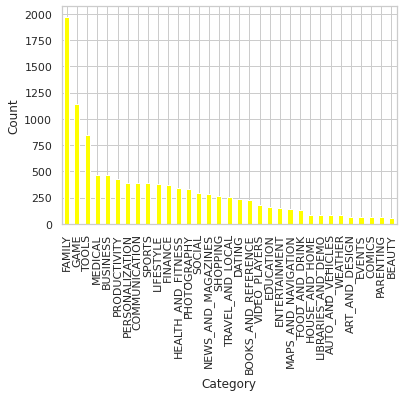

In [ ]:
gdp["Category"].value_counts().plot(kind ="bar",color="yellow");
plt.xlabel("Category");
plt.ylabel("Count");

This shows that the top most category is family followed by games,tools,medical etc

In [ ]:
top5_cat= top_cat['Category'].tolist()
data_top5 = gdp.groupby('Category')['Install'].agg('sum').loc[top5_cat].reset_index(name="Number installations")
data=gdp.groupby('Category')['Install'].agg('sum').reset_index(name="Number installations")

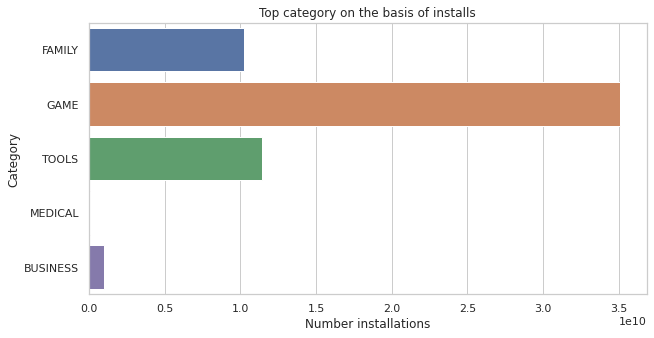

In [ ]:
fig=plt.figure(figsize=(10,5))
title=plt.title('Top category on the basis of installs')
bar=sns.barplot(y=data_top5['Category'],x=data_top5['Number installations'])
plt.show(bar)

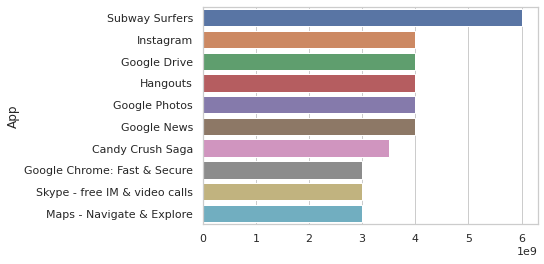

In [ ]:
x=gdp.groupby("App").Install.sum().sort_values(ascending=False).head(10)
sns.barplot(x.values,x.index)

In [ ]:
Most dowloaded app is Subway Surfers which is followed by instagram, Google drive etc.

In [ ]:
install_sum_content=gdp.groupby('Content Rating')['Install'].agg('sum').reset_index(name="Number_Installations")
app_sum_content =gdp.groupby('Content Rating')['Install'].size().reset_index(name='Number_Apps')


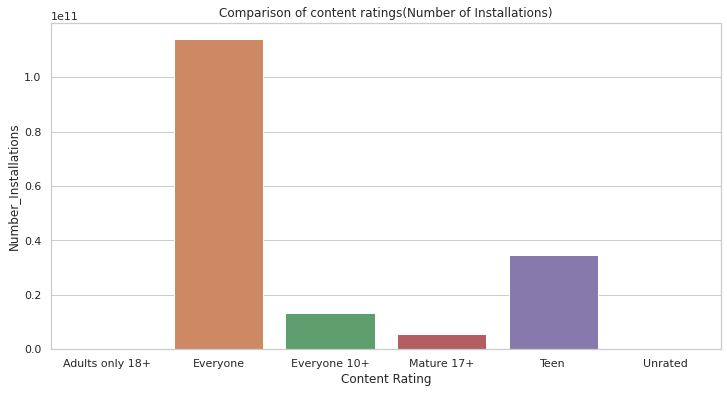

In [ ]:
fig=plt.figure(figsize=(12,6))

title=plt.title('Comparison of content ratings(Number of Installations)')
content_bar=sns.barplot(x=install_sum_content['Content Rating'],y=install_sum_content['Number_Installations'])
plt.show(content_bar)

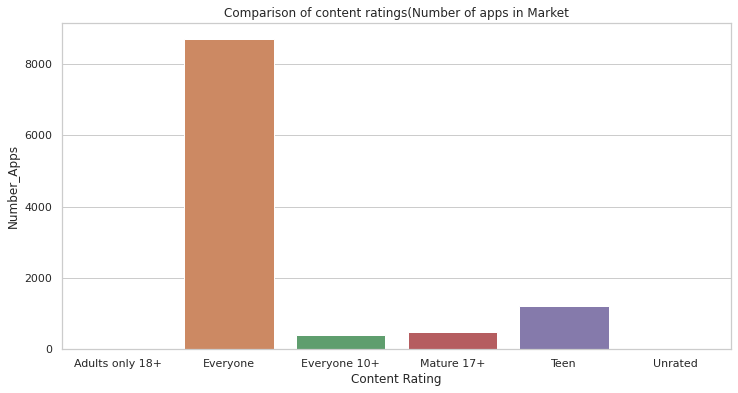

In [ ]:
fig=plt.figure(figsize=(12,6))
title=plt.title('Comparison of content ratings(Number of apps in Market')
content_bar=sns.barplot(x=app_sum_content['Content Rating'],y=app_sum_content['Number_Apps'])
plt.show(content_bar)

The aove graphs shows significant no of installations on content other than Everyone like teens and Everyone 10+.

In [ ]:
content=pd.DataFrame()
content['Content Rating'] = app_sum_content['Content Rating']
content['No_Installations/Total_ Apps']=install_sum_content['Number_Installations']/app_sum_content['Number_Apps']


In [ ]:
content

,Content Rating,No_Installations/Total_ Apps
0,Adults only 18+,6.666667e+05
1,Everyone,1.310037e+07
2,Everyone 10+,3.196590e+07
3,Mature 17+,1.107112e+07
4,Teen,2.873870e+07
5,Unrated,2.525000e+04


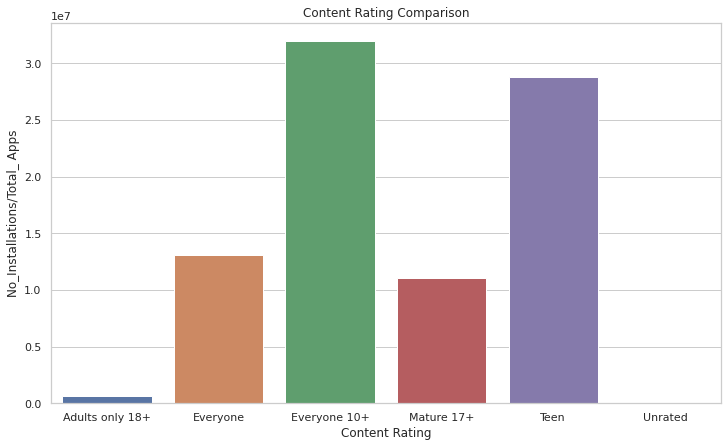

In [ ]:
figure=plt.figure(figsize=(12,7))
title=plt.title('Content Rating Comparison')
bar=sns.barplot(x=content['Content Rating'],y=content['No_Installations/Total_ Apps'])
plt.show(bar)

Here we did a plot between the content rating and number of installations by total apps. We see that there are significant amount of installations so content rating play an important part in predicting our target variable , install.

# Conclusion

*Ratigs have an effect on our target variable. The higher the rating, more people will be inclined o download the app.

*Similarly , the better the reviews, more are the chances for the app to be downloaded by more people.

*Subway surfer is th most downloaded appa followed by instagram, Hangouts and google drive..